In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

dark_horse = cv2.imread('DATA//horse.jpg')
show_horse = cv2.cvtColor(dark_horse, cv2.COLOR_BGR2RGB) # convert to rgb to show on matplotlib

rainbow = cv2.imread("DATA//rainbow.jpg") 
show_rainbow = cv2.cvtColor(rainbow, cv2.COLOR_BGR2RGB)

blue_bricks = cv2.imread("DATA//bricks.jpg")
show_bricks = cv2.cvtColor(blue_bricks, cv2.COLOR_BGR2RGB)

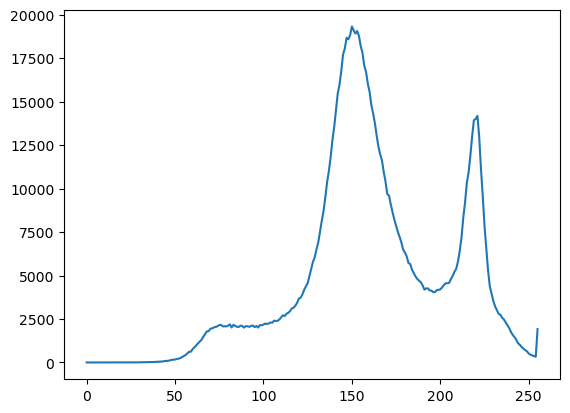

In [13]:
hist_bricks = cv2.calcHist([blue_bricks], channels=[0], mask=None, histSize=[256], ranges=[0,256]) # 0 is blue channel - opencv is in bgr format
hist_bricks.shape # 256 rows, 1 column
plt.plot(hist_bricks) # plot the histogram for the blue channel of bricks

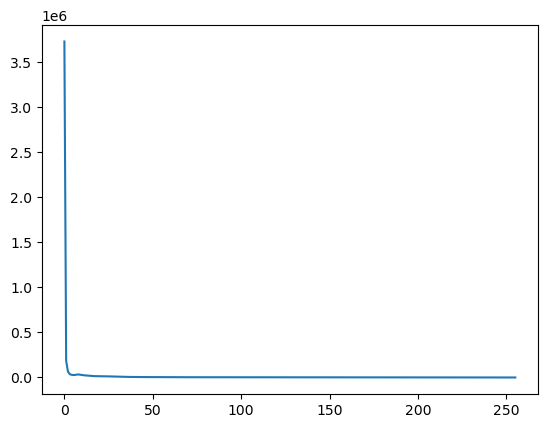

In [15]:
hist_horse = cv2.calcHist([dark_horse], channels=[0], mask=None, histSize=[256], ranges=[0,256]) # 0 is blue channel - opencv is in bgr format
plt.plot(hist_horse) # plot the histogram for the blue channel of dark horse

# we are expecting almost no blue color at all

Text(0.5, 1.0, 'Blue Bricks')

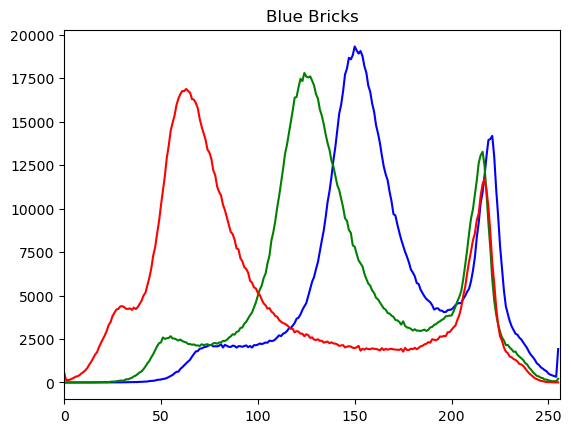

In [24]:
color = ('b', 'g', 'r') # tuple of colors

for i,col in enumerate(color): # ploting all the colors for blue bricks
    hist_bricks_all_colors = cv2.calcHist([blue_bricks], channels=[i], mask=None, histSize=[256], ranges=[0,256]) # emumerate gives us the index of the color.
    plt.plot(hist_bricks_all_colors, color=col)
    plt.xlim([0,256]) # set the x axis limit to 0 to 255
    
plt.title("Blue Bricks")

Text(0.5, 1.0, 'Histogram for Masked Rainbow Image')

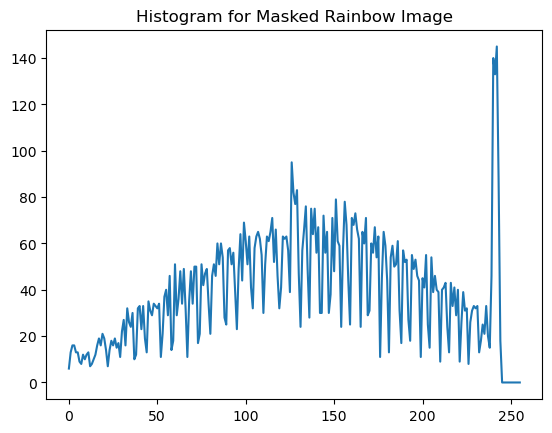

In [31]:
### Color Histogram for Masks ### 

img = rainbow 

# Creating a Mask
mask = np.zeros(img.shape[:2], dtype=np.uint8)
mask[200:300, 200:300] = 255 # white rectangle

# Masking the rainbow
masked_img = cv2.bitwise_and(img, img, mask=mask)
show_masked_img = cv2.bitwise_and(show_rainbow, show_rainbow, mask=mask) # for visualization only

hist_mask_values_red = cv2.calcHist([rainbow], channels=[2], mask=mask, histSize=[256], ranges=[0,256]) # histogram for the red channel of the mask.
plt.plot(hist_mask_values_red)
plt.title("Histogram for Masked Rainbow Image")



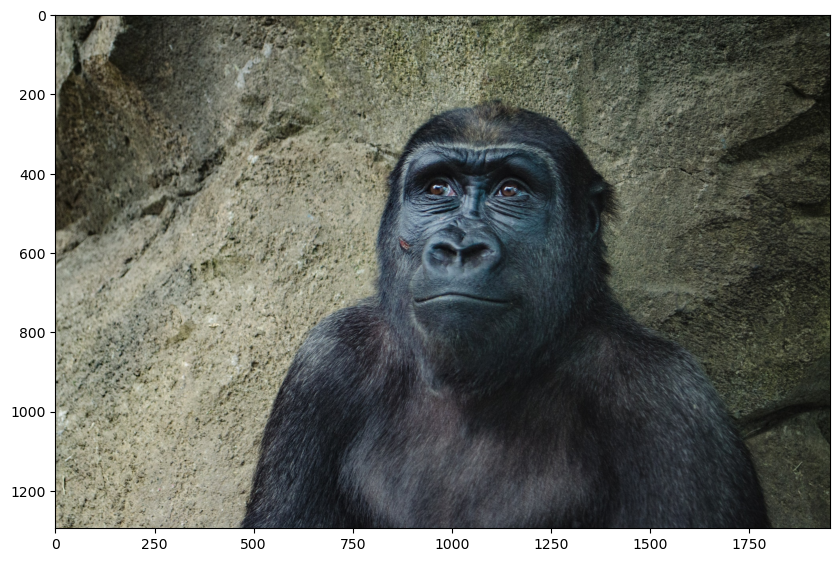

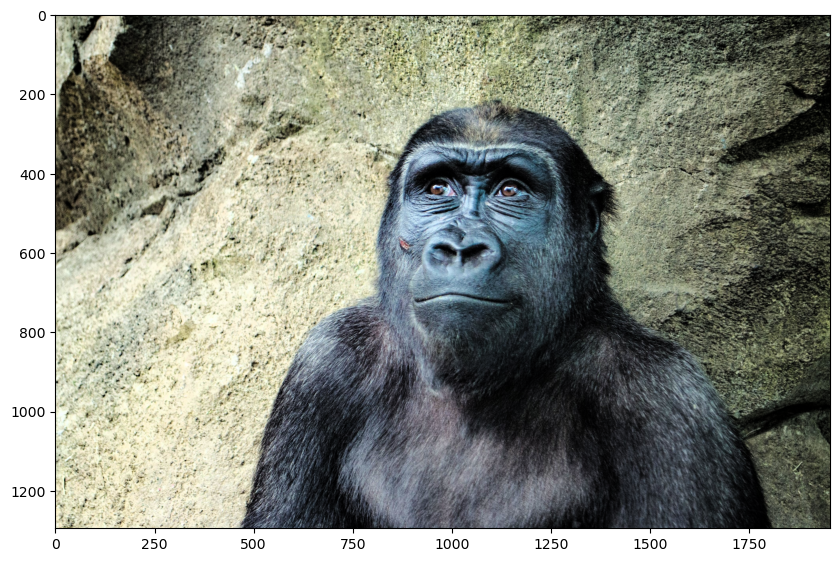

In [48]:
### Histogram Equalization ### - improves the contrast of the image

gorilla = cv2.imread("DATA//gorilla.jpg", 0) # 0 for grayscale

def display_img(img, cmap="gray"):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap)
    

hist_gorilla = cv2.calcHist([gorilla], channels=[0], mask=None, histSize=[256], ranges=[0,256])
# plt.plot(hist_gorilla)

equalized = cv2.equalizeHist(gorilla) # equalize the histogram (improving contrast)
# display_img(equalized)

hist_gorilla_equalized = cv2.calcHist([equalized], channels=[0], mask=None, histSize=[256], ranges=[0,256])
# plt.plot(hist_gorilla_equalized)

color_gorilla = cv2.imread("DATA//gorilla.jpg")
original = cv2.cvtColor(color_gorilla, cv2.COLOR_BGR2RGB)
display_img(original)
hsv = cv2.cvtColor(color_gorilla, cv2.COLOR_BGR2HSV)
hsv[:,:,2] = cv2.equalizeHist(hsv[:,:,2]) # equalize the histogram of the value channel
equalized_color_gorilla = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB) # convert back to RGB

display_img(equalized_color_gorilla)